### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
def Ingreso_Total(tienda):
  """
  Calculo de los ingresos totales de la tienda

  Args:
    tienda (pandas.DataFrame): DataFrame de la tienda

  Returns:
    int: Ingresos totales de la tienda
  """
  return tienda["Precio"].sum()
Ingreso_tienda_1 = Ingreso_Total(tienda)
Ingreso_tienda_2 = Ingreso_Total(tienda2)
Ingreso_tienda_3 = Ingreso_Total(tienda3)
Ingreso_tienda_4 = Ingreso_Total(tienda4)
print(f'Ingresos de la tienda 1: {Ingreso_tienda_1}\nIngresos de la tienda 2: {Ingreso_tienda_2}')
print(f'Ingresos de la tienda 3: {Ingreso_tienda_3}\nIngresos de la tienda 4: {Ingreso_tienda_4}')

Ingresos de la tienda 1: 1150880400.0
Ingresos de la tienda 2: 1116343500.0
Ingresos de la tienda 3: 1098019600.0
Ingresos de la tienda 4: 1038375700.0


In [4]:
Ingresos_tiendas = [Ingreso_tienda_1,Ingreso_tienda_2,Ingreso_tienda_3,Ingreso_tienda_4]

def analizar_ingresos(Ingresos_tiendas):
  """
  Calculo de ingresos totales de las tiendas y la tienda con los ingresos menores

  Args:
    Ingresos_tiendas (list): lista de ingresos de las tiendas

  Returns:
    tuple:
    Ingreso_total_tiendas (int): Ingresos totales de las tiendas
    menor (int): Ingresos de la tienda con los ingresos menores
    num_tienda (int): Número de la tienda con los ingresos menores
  """
  Ingreso_total_tiendas = 0
  menor = Ingresos_tiendas[0]
  num_tienda = 1
  for i in range(len(Ingresos_tiendas)):
    Ingreso_total_tiendas += Ingresos_tiendas[i]
    if Ingresos_tiendas[i] < menor:
      menor = Ingresos_tiendas[i]
      num_tienda = i + 1
  return Ingreso_total_tiendas, menor, num_tienda

Ingreso_total_tiendas, menor, num_tienda = analizar_ingresos(Ingresos_tiendas)

print(f'Ingreso total de las tiendas: {Ingreso_total_tiendas}')
print(f'La tienda con los menores ingresos es la tienda {num_tienda} con ${menor}')


Ingreso total de las tiendas: 4403619200.0
La tienda con los menores ingresos es la tienda 4 con $1038375700.0


# 2. Ventas por categoría

In [5]:
def Listar_categorias(tienda):
  """
  Calculo de las categorias de la tienda

  Args:
    tienda (pandas.DataFrame): DataFrame de la tienda

  Returns:
    list: Lista de las categorias de la tienda
  """
  return tienda["Categoría del Producto"].unique()

categorias_t1 = Listar_categorias(tienda)
categorias_t2 = Listar_categorias(tienda2)
categorias_t3 = Listar_categorias(tienda3)
categorias_t4 = Listar_categorias(tienda4)

print(f'Categorias de la tienda 1: {categorias_t1}')
print(f'Categorias de la tienda 2: {categorias_t2}')
print(f'Categorias de la tienda 3: {categorias_t3}')
print(f'Categorias de la tienda 4: {categorias_t4}')


Categorias de la tienda 1: ['Electrónicos' 'Muebles' 'Juguetes' 'Electrodomésticos'
 'Artículos para el hogar' 'Deportes y diversión' 'Libros'
 'Instrumentos musicales']
Categorias de la tienda 2: ['Muebles' 'Instrumentos musicales' 'Deportes y diversión' 'Electrónicos'
 'Artículos para el hogar' 'Juguetes' 'Electrodomésticos' 'Libros']
Categorias de la tienda 3: ['Electrodomésticos' 'Muebles' 'Instrumentos musicales'
 'Deportes y diversión' 'Electrónicos' 'Juguetes'
 'Artículos para el hogar' 'Libros']
Categorias de la tienda 4: ['Electrodomésticos' 'Muebles' 'Deportes y diversión' 'Libros'
 'Electrónicos' 'Instrumentos musicales' 'Juguetes'
 'Artículos para el hogar']


In [6]:
# creando diccionario para tiendas
tiendas = {
    'tienda 1': tienda,
    'tienda 2': tienda2,
    'tienda 3': tienda3,
    'tienda 4': tienda4
}

# creando diccionario para categorías
categorias = {
    'tienda 1': categorias_t1,
    'tienda 2': categorias_t2,
    'tienda 3': categorias_t3,
    'tienda 4': categorias_t4
}

def ventas_por_categoria(tiendas, categorias):
  """
  Calculo de las ventas por categoria de las tiendas

  Args:
    tiendas (dict): diccionario de las tiendas
    categorias (dict): diccionario de las categorias

  Returns:
    dict: diccionario de las ventas por categoria de las tiendas
  """
  ventas_por_tienda = {}
  for nombre_tienda, tienda in tiendas.items():
    # Filtrar el DataFrame para incluir solo las categorías de la tienda actual
    tienda_filtrada = tienda[tienda["Categoría del Producto"].isin(categorias[nombre_tienda])]
    # Calcular las ventas por categoría para la tienda actual
    ventas_por_tienda[nombre_tienda] = tienda_filtrada["Categoría del Producto"].value_counts()
  return ventas_por_tienda

ventas_por_tienda = ventas_por_categoria(tiendas,categorias)

for nombre_tienda, ventas in ventas_por_tienda.items():
    print(f'Ventas por categoría de {nombre_tienda}:\n{ventas}')

Ventas por categoría de tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64
Ventas por categoría de tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64
Ventas por categoría de tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64
Ventas 

# 3. Calificación promedio de la tienda


In [7]:
def valoracion_promedio(tiendas):
  """
  Calculo de la calificación promedio de la tienda

  Args:
    tiendas (dict): diccionario de las tiendas

  Returns:
    dict: diccionario de la calificación promedio de la tienda
  """
  valoracion_promedio = {}
  for nombre_tienda, tienda in tiendas.items():
    valoracion_promedio[nombre_tienda] = tienda["Calificación"].mean()
  return valoracion_promedio

valoracion_promedio = valoracion_promedio(tiendas)

for nombre_tienda, valoracion in valoracion_promedio.items():
    print(f'Valoracion promedio de {nombre_tienda}: {valoracion}')


Valoracion promedio de tienda 1: 3.976685036032217
Valoracion promedio de tienda 2: 4.037303942348453
Valoracion promedio de tienda 3: 4.048325561678677
Valoracion promedio de tienda 4: 3.9957591178965224


In [8]:
def ordenar_valoracion_promedio(valoracion_promedio):
  """
  Calculo de la calificación promedio de la tienda

  Args:
    valoracion_promedio (dict): diccionario de la calificación

  Returns:
    dict: diccionario de la calificación promedio de la tienda
  """
  valoracion_promedio = dict(sorted(valoracion_promedio.items(), key=lambda item: item[1], reverse=True))
  return valoracion_promedio

valoracion_promedio_ordenada = ordenar_valoracion_promedio(valoracion_promedio)

for nombre_tienda, valoracion in valoracion_promedio_ordenada.items():
    print(f'Valoracion promedio de {nombre_tienda}: {valoracion}')

Valoracion promedio de tienda 3: 4.048325561678677
Valoracion promedio de tienda 2: 4.037303942348453
Valoracion promedio de tienda 4: 3.9957591178965224
Valoracion promedio de tienda 1: 3.976685036032217


# 4. Productos más y menos vendidos

In [28]:
def producto_estrella_y_menos_vendido(tiendas):
  """
  Calculo de los productos más y menos vendidos de la tienda

  Args:
    tiendas (dict): diccionario de las tiendas

  Returns:
    dict: diccionario de los productos
  """
  productos_estrellas_y_menos_vendidos = {}
  for nombre_tienda, tienda in tiendas.items():
    # Calcular el número de ventas por producto
    ventas_por_producto = tienda["Producto"].value_counts()

    # Obtener el producto con más ventas
    producto_mas_vendido = ventas_por_producto.max()
    productos_mas_vendidos = ventas_por_producto[ventas_por_producto == producto_mas_vendido].index.tolist()

    # Obtener el producto con menos ventas
    producto_menos_vendido = ventas_por_producto.min()
    productos_menos_vendidos = ventas_por_producto[ventas_por_producto == producto_menos_vendido].index.tolist()

    productos_estrellas_y_menos_vendidos[nombre_tienda] = {
            "productos_mas_vendidos": productos_mas_vendidos,
            "productos_menos_vendidos": productos_menos_vendidos
        }
  return productos_estrellas_y_menos_vendidos

productos_estrellas_y_menos_vendidos = producto_estrella_y_menos_vendido(tiendas)

print(productos_estrellas_y_menos_vendidos)

{'tienda 1': {'productos_mas_vendidos': ['Microondas', 'TV LED UHD 4K', 'Armario'], 'productos_menos_vendidos': ['Auriculares con micrófono', 'Celular ABXY']}, 'tienda 2': {'productos_mas_vendidos': ['Iniciando en programación'], 'productos_menos_vendidos': ['Juego de mesa']}, 'tienda 3': {'productos_mas_vendidos': ['Kit de bancas'], 'productos_menos_vendidos': ['Bloques de construcción']}, 'tienda 4': {'productos_mas_vendidos': ['Cama box'], 'productos_menos_vendidos': ['Guitarra eléctrica']}}


In [10]:
for nombre_tienda, productos in productos_estrellas_y_menos_vendidos.items():
    print(f'Productos estrella y menos vendidos de {nombre_tienda}:')
    print(f'  Productos más vendidos: {productos["productos_mas_vendidos"]}')
    print(f'  Productos menos vendidos: {productos["productos_menos_vendidos"]}')

Productos estrella y menos vendidos de tienda 1:
  Productos más vendidos: ['Microondas', 'TV LED UHD 4K', 'Armario']
  Productos menos vendidos: ['Auriculares con micrófono', 'Celular ABXY']
Productos estrella y menos vendidos de tienda 2:
  Productos más vendidos: ['Iniciando en programación']
  Productos menos vendidos: ['Juego de mesa']
Productos estrella y menos vendidos de tienda 3:
  Productos más vendidos: ['Kit de bancas']
  Productos menos vendidos: ['Bloques de construcción']
Productos estrella y menos vendidos de tienda 4:
  Productos más vendidos: ['Cama box']
  Productos menos vendidos: ['Guitarra eléctrica']


# 5. Envío promedio por tienda

In [11]:
def costo_de_envio_promedio(tiendas):
  """
  Calculo del costo de envio promedio de la tienda

  Args:
    tiendas (dict): diccionario de las tiendas

  Returns:
    dict: diccionario del costo de envio promedio de la tienda
  """
  costo_de_envio_promedio = {}
  for nombre_tienda, tienda in tiendas.items():
    # Calcular el costo de envío promedio
    costo_de_envio_promedio[nombre_tienda] = tienda["Costo de envío"].mean()
  return costo_de_envio_promedio

costo_de_envio_promedio = costo_de_envio_promedio(tiendas)

for nombre_tienda, costo in costo_de_envio_promedio.items():
    print(f'Costo de envío promedio de {nombre_tienda}: {costo}')

Costo de envío promedio de tienda 1: 26018.60958033065
Costo de envío promedio de tienda 2: 25216.235693090293
Costo de envío promedio de tienda 3: 24805.680373039424
Costo de envío promedio de tienda 4: 23459.457167090754


In [12]:
def ordenar_costo_de_envio_promedio(costo_de_envio_promedio):
  """
  Calculo del costo de envio promedio de la tienda

  Args:
    costo_de_envio_promedio (dict): diccionario del costo de envio

  Returns:
    dict: diccionario del costo de envio promedio de la tienda
  """
  costo_de_envio_promedio = dict(sorted(costo_de_envio_promedio.items(), key=lambda item: item[1], reverse=True))
  return costo_de_envio_promedio

costo_de_envio_promedio_ordenado = ordenar_costo_de_envio_promedio(costo_de_envio_promedio)

for nombre_tienda, costo in costo_de_envio_promedio_ordenado.items():
    print(f'Costo de envío promedio de {nombre_tienda}: {costo}')

Costo de envío promedio de tienda 1: 26018.60958033065
Costo de envío promedio de tienda 2: 25216.235693090293
Costo de envío promedio de tienda 3: 24805.680373039424
Costo de envío promedio de tienda 4: 23459.457167090754


#6. Generación de gráficos

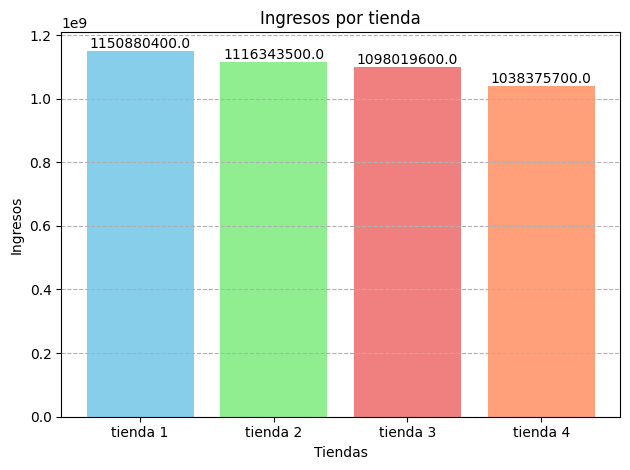

In [32]:
# importando matplotlib
import matplotlib.pyplot as plt

# gráfico de barras para los ingresos por tienda

# creando diccionario de ingresos
Ingresos_tiendas = {
    'tienda 1': Ingreso_tienda_1,
    'tienda 2': Ingreso_tienda_2,
    'tienda 3': Ingreso_tienda_3,
    'tienda 4': Ingreso_tienda_4
}

# definiendo colores
colores = ['#87CEEB', '#90EE90', '#F08080', '#FFA07A'] # a partir de aquí se usarán estos colores para las tiendas según corresponda

# creando gráfico
fig, ax = plt.subplots()

# asignando colores a las tiendas
for i, tienda in enumerate(Ingresos_tiendas.keys()):
    ax.bar(tienda, Ingresos_tiendas[tienda], color=colores[i])

# etiquetas con valor numérico
for i, barra in enumerate(ax.patches):
  ancho = barra.get_x() + barra.get_width() / 2
  alto = barra.get_height()
  valor = round(alto,2)
  ax.text(ancho, alto, str(valor), ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Tiendas')
ax.set_ylabel('Ingresos')
ax.set_title('Ingresos por tienda')
ax.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

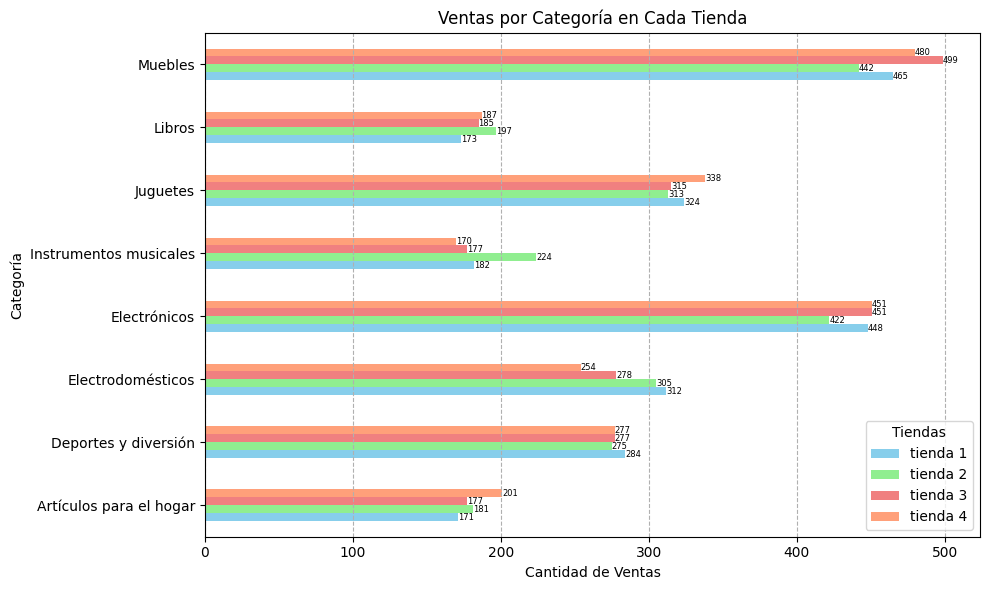

In [14]:
# gráfico de barras horizontales para ventas por categorías
# se usará el diccionario ventas_por_tienda

# eliminando ceros
ventas_por_tienda_por_categoria = pd.DataFrame.from_dict(ventas_por_tienda) # creación DataFrame
ventas_por_tienda_por_categoria = ventas_por_tienda_por_categoria.fillna(0)

# creación de gráficas de barras horizontales agrupadas
ax = ventas_por_tienda_por_categoria.plot(kind='barh', figsize=(10, 6), color=colores)

# etiquetas con valor numérico
for i, barra in enumerate(ax.patches):
  ancho = barra.get_width()
  alto = barra.get_y() + barra.get_height() / 2
  valor = round(ancho)
  ax.text(ancho, alto, str(valor,), ha='left', va='center', fontsize=6)

# configuración de la gráfica
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Categoría')
plt.title('Ventas por Categoría en Cada Tienda')
ax.grid(axis='x', linestyle='--')
plt.legend(title='Tiendas')
plt.tight_layout()
plt.show()

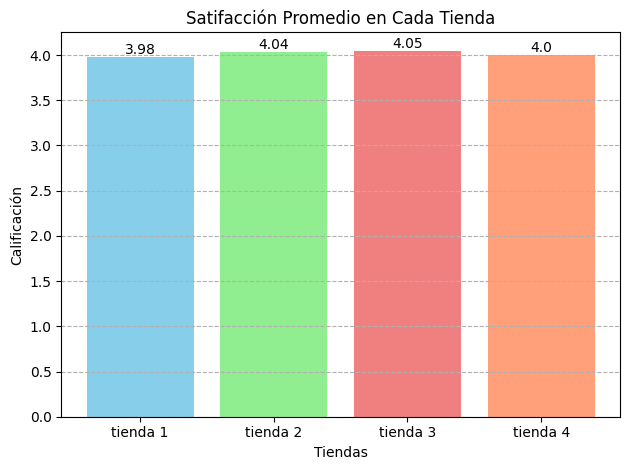

In [31]:
# gráfico de barras para la satisfacción del cliente
# se usará el diccionario valoracion_promedio

# creación del gráfico
fig, ax = plt.subplots()

# asignación de colores
for i, tienda in enumerate(valoracion_promedio.keys()):
  ax.bar(tienda, valoracion_promedio[tienda], color=colores[i])

# etiquetas con valor numérico
for i, barra in enumerate(ax.patches):
  ancho = barra.get_x() + barra.get_width() / 2
  alto = barra.get_height()
  valor = round(alto,2)
  ax.text(ancho, alto, str(valor), ha='center', va='bottom', fontsize=10)

# configuración de la gráfica
plt.xlabel('Tiendas')
plt.ylabel('Calificación')
plt.title('Satifacción Promedio en Cada Tienda')
ax.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

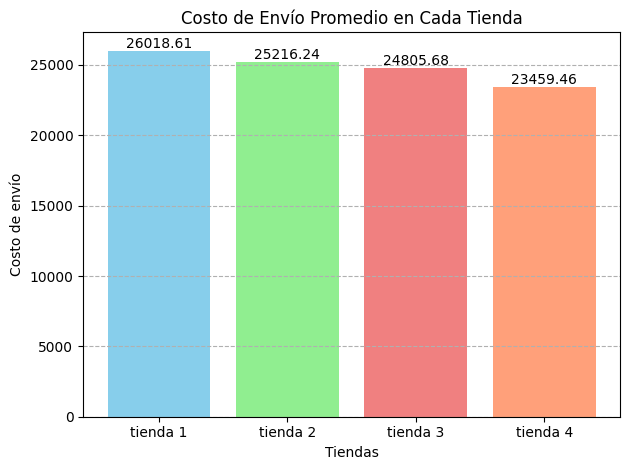

In [30]:
# gráfica para el costo de envío promedio
# nota: para los productos más y menos vendidos no se está haciendo gráfica debido a que sería demasiado engorroso leer la gráfica, más de 40 productos
# se usará el diccionario costo_de_envio_promedio

# creación del gráfico
fig, ax = plt.subplots()

# asignación de colores
for i, tienda in enumerate(costo_de_envio_promedio.keys()):
  ax.bar(tienda, costo_de_envio_promedio[tienda], color=colores[i])

# etiquetas con valor numérico
for i, barra in enumerate(ax.patches):
  ancho = barra.get_x() + barra.get_width() / 2
  alto = barra.get_height()
  valor = round(alto,2)
  ax.text(ancho, alto, str(valor), ha='center', va='bottom', fontsize=10)

# configuración de la gráfica
plt.xlabel('Tiendas')
plt.ylabel('Costo de envío')
plt.title('Costo de Envío Promedio en Cada Tienda')
ax.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

#7. Informe final
##a. Introducción
El objetivo del siguiente informe es indicar la mejor opción para el Sr. Juan con respecto a qué tienda de la cadena Alura Store debería vender. Para tomar esta decisión se realizó un análisis de los siguientes puntos:
1. Ingresos generados por cada tienda
2. La popularidad de las categorías por tienda (número de ventas por categoría)
3. Calificación promedio de los clientes
4. Productos más y menos en cada tienda
5. Costo de envío promedio


##b. Desarrollo de los hallazgos
1. Ingresos generados por cada tienda

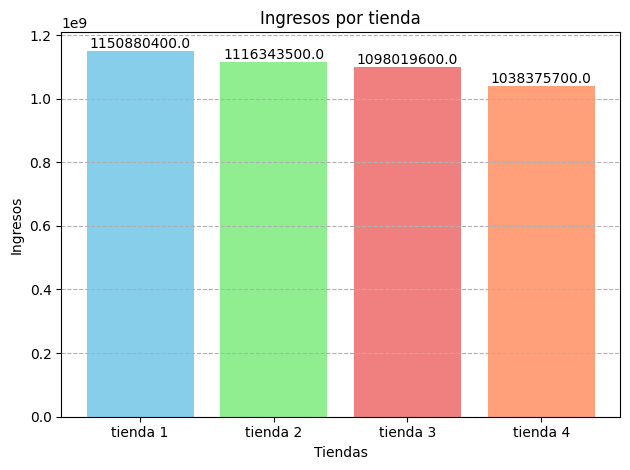

La Tienda 1 lidera en facturación total, seguida por la Tienda 2 y Tienda 3. La Tienda 4 es la que menos factura.

2. La popularidad de las categorías por tienda (número de ventas por categoría)

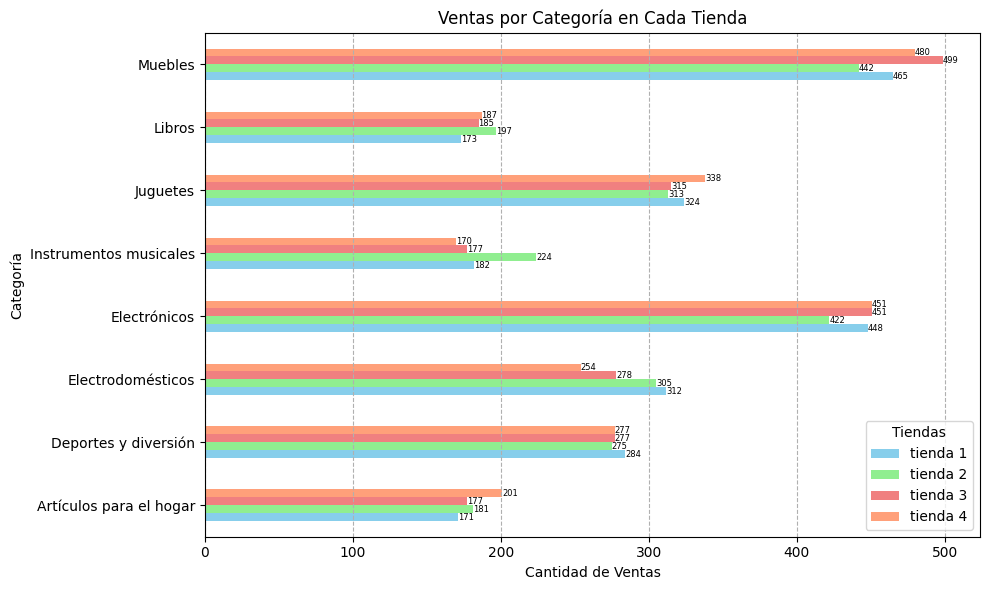

En todas las tiendas predominan las categorías de **Muebles** y **Electrónicos**. La Tienda 3 destaca como la que más vende en ambas.

3. Calificación promedio de los clientes

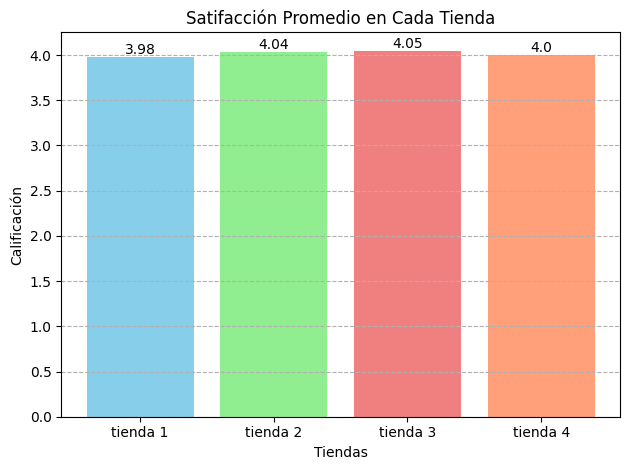

Tienda 3 es la mejor valorada por los clientes.

4. Productos más y menos en cada tienda

| TIENDA      | Más Vendidos      | Menos Vendidos       |
|-----------------|-----------------|-----------------|
| Tienda 1  | Microondas, TV LED UHD 4K, Armario  | Auriculares con micrófono, Celular ABXY  |
| Tienda 2  | Iniciando en programación  | Juego de mesa  |
| Tienda 3  | Kit de bancas  | Bloques de construcción  |
| Tienda 4  | Cama box  | Guitarra eléctrica  |

5. Costo de envío promedio

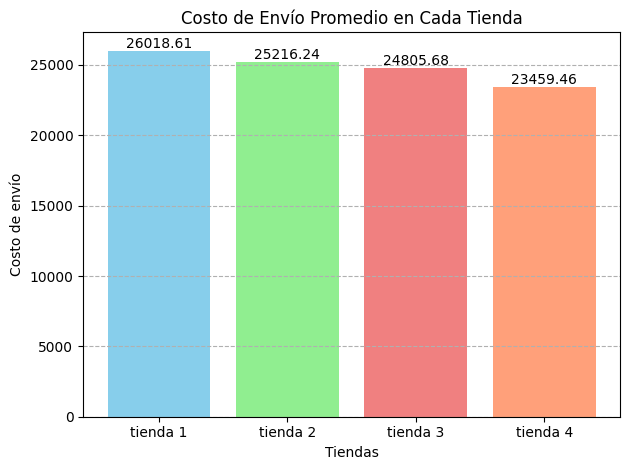

Tienda 4 tiene el costo de envío más bajo, pero la diferencia entre ella y Tienda 3 es mínima (alrededor de 1347 unidades monetarias).

##c. Conclusión y recomendación
Luego de analizar los hallazgos mostrados anteriormente la conclusión a la que se llega es la siguiente:

**Recomendación: vender a la tienda 3**

###Justificación
1. Mejor equilibrio entre ingreso y satisfacción:

*   Si bien podemos ver que la Tienda 1 es la que más ingresos genera, generando entre un 4-5% más que la Tienda 3, esta última combina ingresos altos con la mayor calificación del cliente (4.05/5).

2. Demanda diversificada:

*   Lidera en ventas absolutas de las dos categorías clave (Muebles y Electrónicos) y cuenta con un producto estrella sólido, lo que reduce la dependencia de un único ítem.

3. Logística competitiva

*   Su costo de envío es el segundo más bajo; la diferencia con Tienda 4 (la más barata) es de apenas 1347 unidades monetarias en promedio, pero con mucha mejor valoración y mayores ventas.

4. Menor riesgo reputacional

*   La alta valoración sugiere menos devoluciones y mayor fidelidad, factores clave para el prestigio del Sr. Juan.

**Planes alternativos**

*   Si el Sr. Juan priorizara exclusivamente el volumen de ventas y aceptara la calificación más baja, la Tienda 1 sería la opción.
*   Si prioriza minimizar costos logísticos, podría escoger la Tienda 4, asumiendo menor facturación y percepción de clientes.

En resumen, la Tienda 3 es la que ofrece una mezcla óptima entre ingresos, satisfacción y eficiencia, convirtiéndose en la mejor opción para maximizar tanto la rentabilidad como la reputación a largo plazo.